## Assignement 2
### Food Hazard Detection

## 1. Data Loading and Inspection
First step is to load the data directly from github repository and take a look into an overview of the dataframe that we create 

In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\steli\OneDrive\Desktop\Stelios\DSAUEB\Trimester 1\PDS\A2\PDS-A2\Data\incidents_train.csv"
df = pd.read_csv(file_path)

# Initial inspection of the data
data_overview = {
    'Shape': df.shape,
    'Columns': df.columns.tolist(),
    'Data Types': df.dtypes,
    'Missing Values': df.isnull().sum(),
}

print(data_overview)
df

{'Shape': (5082, 11), 'Columns': ['Unnamed: 0', 'year', 'month', 'day', 'country', 'title', 'text', 'hazard-category', 'product-category', 'hazard', 'product'], 'Data Types': Unnamed: 0           int64
year                 int64
month                int64
day                  int64
country             object
title               object
text                object
hazard-category     object
product-category    object
hazard              object
product             object
dtype: object, 'Missing Values': Unnamed: 0          0
year                0
month               0
day                 0
country             0
title               0
text                0
hazard-category     0
product-category    0
hazard              0
product             0
dtype: int64}


,Unnamed: 0,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...,...,...,...,...
5077,5979,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits
5078,5980,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022\n\n \n High - Class I\n\n Produc...,fraud,prepared dishes and snacks,inspection issues,pizza
5079,5981,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages
5080,5982,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022\n\n \n High - Class I\n\n Misbra...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products


### Dropping Unnecessary Index Column
Removing not meaningful columns such as index 

In [2]:
# Drop the unnecessary index column
df = df.drop(columns=['Unnamed: 0'])
df

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...,...,...,...
5077,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits
5078,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022\n\n \n High - Class I\n\n Produc...,fraud,prepared dishes and snacks,inspection issues,pizza
5079,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages
5080,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022\n\n \n High - Class I\n\n Misbra...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products


### Statistical summary of the data 

In [3]:
# Generate statistical summary for numerical columns
numerical_summary = df.describe()
numerical_summary


,year,month,day
count,5082.000000,5082.000000,5082.000000
mean,2016.461433,6.347501,15.606848
std,4.910835,3.414958,8.653473
min,1994.000000,1.000000,1.000000
25%,2015.000000,3.000000,8.000000
50%,2018.000000,6.000000,15.000000
75%,2020.000000,9.000000,23.000000
max,2022.000000,12.000000,31.000000


The dataset spans from 1994 to 2022, with most incidents occurring in recent years, particularly after 2015. The average incident year is 2016, indicating a focus on modern data, while monthly values center around June, hinting at potential mid-year peaks. Incident days average around the 15th, suggesting a balanced distribution across the month. Quartile analysis shows that most incidents (75%) occurred between 2015 and 2022, pointing to a recent and perhaps seasonal relevance in the data, which could be valuable for time-series and trend analysis.

In [4]:
# Generate a summary for categorical columns
categorical_summary = df.describe(include=['object'])
categorical_summary

,country,title,text,hazard-category,product-category,hazard,product
count,5082,5082,5082,5082,5082,5082,5082
unique,9,4948,5053,10,22,128,1022
top,us,Various raw beef and raw veal products recalle...,"MG Foods of Charlotte, NC is expanding its rec...",allergens,"meat, egg and dairy products",listeria monocytogenes,ice cream
freq,2195,11,2,1854,1434,665,185


The dataset provides a multi-dimensional view of food hazard incidents, primarily from the U.S. but covering nine countries overall. Analysis shows a high degree of uniqueness in incident titles and descriptions, reflecting varied hazard cases. Categories like allergens and Listeria monocytogenes are common, often associated with products such as meat, dairy, and eggs. The data also reveals that specific products, especially ice cream, appear frequently, which might indicate recurring risks in certain food types.

### Analysis for Categorical Columns

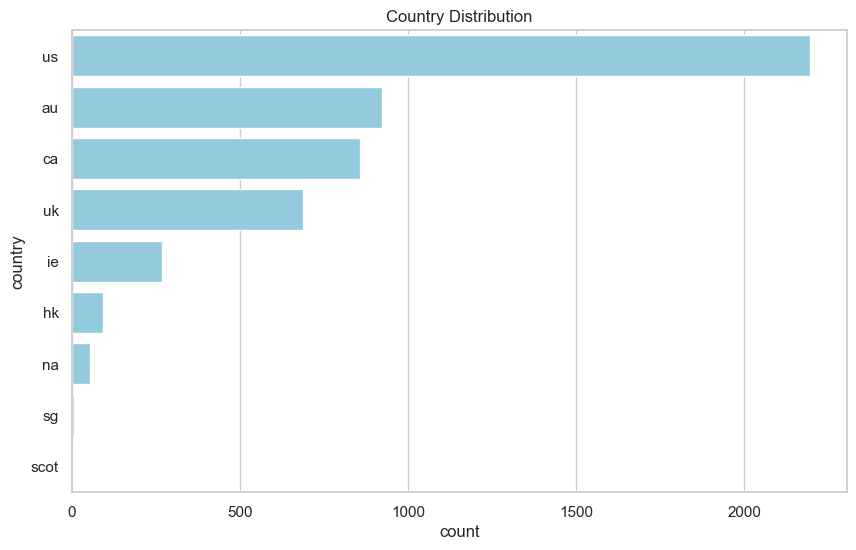

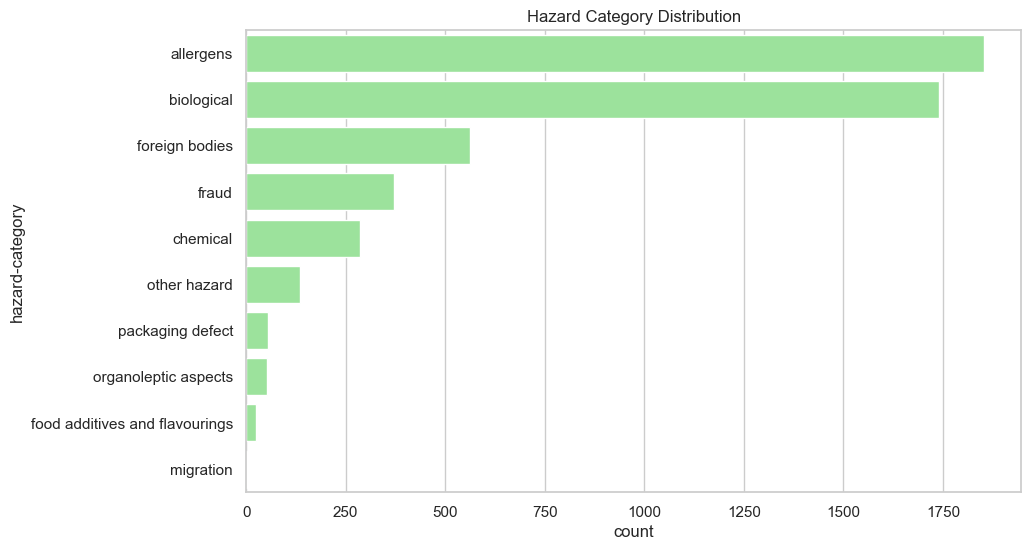

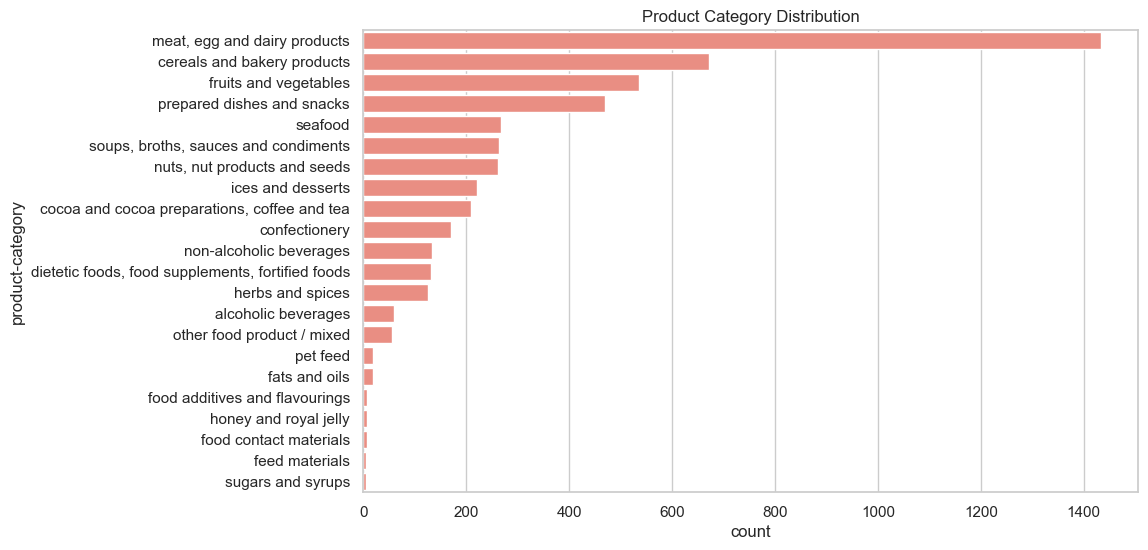

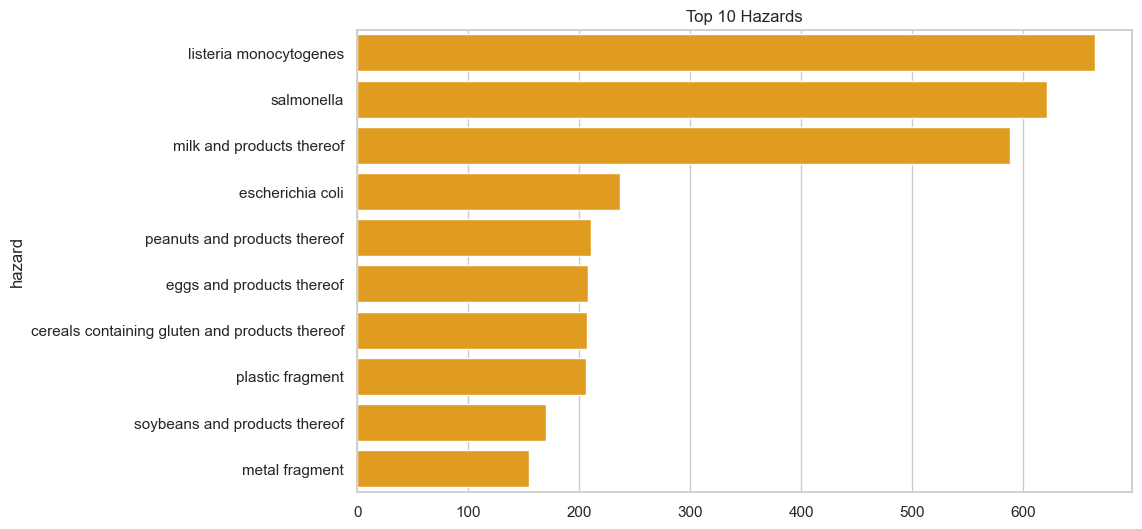

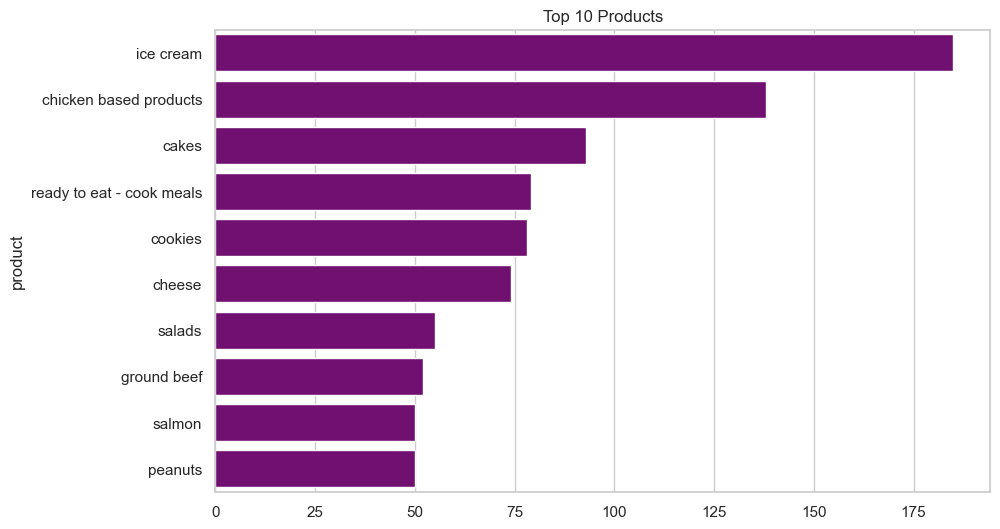

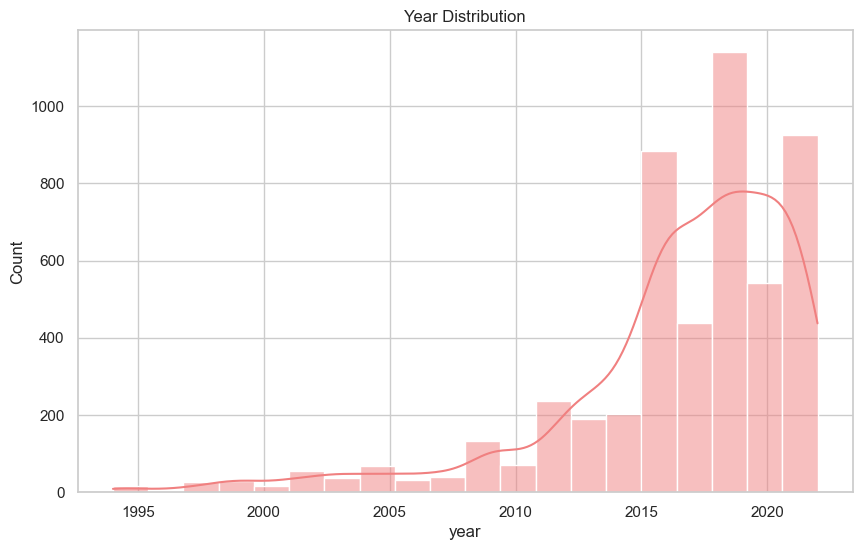

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# Country distribution with a single color
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index, color="skyblue", legend=False)
plt.title('Country Distribution')
plt.show()

# Hazard-category distribution with a single color
plt.figure(figsize=(10, 6))
sns.countplot(y='hazard-category', data=df, order=df['hazard-category'].value_counts().index, color="lightgreen", legend=False)
plt.title('Hazard Category Distribution')
plt.show()

# Product-category distribution with a single color
plt.figure(figsize=(10, 6))
sns.countplot(y='product-category', data=df, order=df['product-category'].value_counts().index, color="salmon", legend=False)
plt.title('Product Category Distribution')
plt.show()

# Hazard distribution (Top 10 hazards) with a single color
top_10_hazards = df['hazard'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_hazards.index, x=top_10_hazards.values, color="orange", legend=False)
plt.title('Top 10 Hazards')
plt.show()

# Product distribution (Top 10 products) with a single color
top_10_products = df['product'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_products.index, x=top_10_products.values, color="purple", legend=False)
plt.title('Top 10 Products')
plt.show()

# Year distribution with a single color
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=20, kde=True, color="lightcoral")
plt.title('Year Distribution')
plt.show()


### Time-Series Analysis

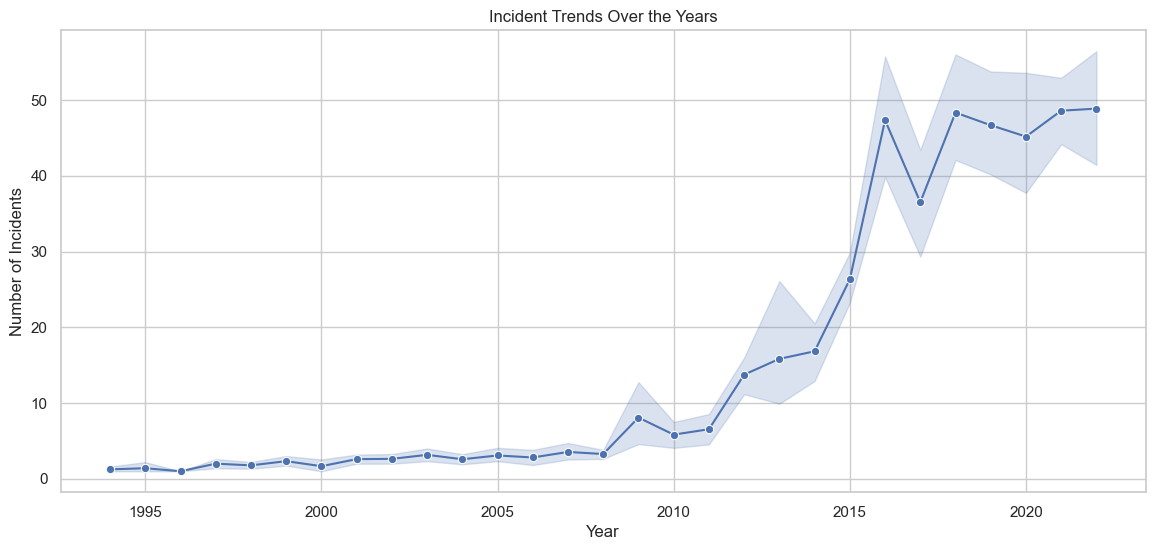

In [6]:
# Aggregate incidents by year and month
time_series_data = df.groupby(['year', 'month']).size().reset_index(name='count')

# Plot time series data
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='count', data=time_series_data, marker="o")
plt.title("Incident Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# Combine all titles into a single string
title_text = ' '.join(df['title'].dropna())

# Generate a word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Incident Titles")
plt.show()
